In [4]:
# Coppied from documentation

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = BaggingClassifier(base_estimator=SVC(),
                         n_estimators=20, random_state=0).fit(X, y)
clf.predict([[0, 0, 0, 0]])

array([1])

In [9]:
# Start messing with parameters here, big this is use decision trees

clf = BaggingClassifier(base_estimator=None,
                         n_estimators=10, random_state=0).fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))
print(clf.predict([[0.5, 0.5, 0.5, 0.5]]))

[1]
[1]


In [21]:
# There is a random forest classifier also, way to get around bagging within sklearn

# Below is from (https://machinelearningmastery.com/bagging-ensemble-with-python/), has more interesting data
# and better data analysis

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# summarize the dataset
print(X.shape, y.shape)

print(y)

model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

(1000, 20) (1000,)
[1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0
 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1
 1 1 1

In [22]:
model = BaggingClassifier(base_estimator=None, n_estimators=10)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.862 (0.037)


In [23]:
model = BaggingClassifier(base_estimator=None, n_estimators=100)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.883 (0.038)


In [24]:
model = BaggingClassifier(base_estimator=None, n_estimators=1000)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.884 (0.038)


In [25]:
accs = []
stds = []
for i in range(10, 101, 10):
    model = BaggingClassifier(base_estimator=None, n_estimators=i)
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    accs.append(mean(n_scores))
    stds.append(std(n_scores))

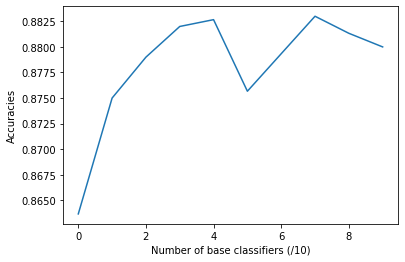

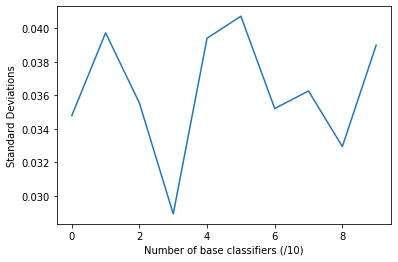

In [27]:
import matplotlib.pyplot as plt

plt.plot(accs)
plt.xlabel("Number of base classifiers (/10)")
plt.ylabel("Accuracies")
plt.show()

plt.plot(stds)
plt.xlabel("Number of base classifiers (/10)")
plt.ylabel("Standard Deviations")
plt.show()


There are a lot more parameters I will experiment with. For now I just looked at the n_estimators which identifies the number of base classifiers, which are decision trees here. the standard deviations seem to be all of the place but with close examination of the graph, it looks like they are all actually very close to each other. There isn't a clear trend other than that. For accuracies, it looks like as the number of base classifiers incresaes the accuracies increases but the growth is logistic. It also looks like there is an exception at 50 base classifiers. Also, it looks like after 70 base classifiers, the accuracy actually decreases (this could be due to overfitting). More base classifier numbers in the tested range and outside of it to confirm/disprove this trend and to see if the outliers are actually outliers.